# MODELING TASKS : ETS MODEL

### SUBMITTED BY: TARUN GULATI

In [5]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import scipy.stats as stats
import numpy as np
from itertools import combinations

import warnings
warnings.filterwarnings('ignore')

In [6]:
#Loading and renaming datasets for easy use. Qualitative is named as store_features

timeseries = pd.read_csv('time_series_data_msba.csv')
store_features = pd.read_csv('qualitative_data_msba.csv')

In [7]:
timeseries['capital_projects.soft_opening_date'] = pd.to_datetime(timeseries['capital_projects.soft_opening_date'])
timeseries['calendar.calendar_day_date'] = pd.to_datetime(timeseries['calendar.calendar_day_date'])

In [8]:
timeseries= timeseries.set_index('calendar.calendar_day_date')

In [9]:
timeseries['Year'] = timeseries.index.year
timeseries['Month'] = timeseries.index.month
timeseries['Day'] = timeseries.index.day
timeseries['DayOfYear'] = timeseries.index.dayofyear

In [10]:
#Creating function to calculate season
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

#Adds "season" column to the timeseries dataset
timeseries['season'] = timeseries.index.month.map(map_month_to_season)

In [11]:
timeseries.sort_index(inplace=True)

In [12]:
# Address null values
timeseries.dropna(inplace=True)

# Create a list of unique site IDs
site_ids = timeseries['site_id_msba'].unique()

# Create a list of unique sales metrics
sales_metrics = [
    'daily_yoy_ndt.total_inside_sales',
    'daily_yoy_ndt.total_food_service',
    'diesel',
    'unleaded'
]

# Initialize an empty DataFrame to store forecasts
all_forecasts = pd.DataFrame(index=timeseries.index)

# Build and forecast for each combination of site ID and sales metric
for site_id in site_ids:
    for sales_metric in sales_metrics:
        site_data = timeseries[(timeseries['site_id_msba'] == site_id)][[sales_metric]]

        # Build the ETS model
        model = ExponentialSmoothing(site_data, trend='add', seasonal='add', seasonal_periods=7)
        model_fit = model.fit()

        # Forecast future sales
        n_forecast = len(timeseries)
        forecast = model_fit.forecast(steps=n_forecast)

        # Store the forecast in the DataFrame
        all_forecasts[f'Site_{site_id}_{sales_metric}'] = forecast

# Now, all_forecasts contains the forecasts for all combinations of site IDs and sales metrics

all_forecasts = all_forecasts.fillna(0)  # Fill missing values with zeros

all_forecasts = all_forecasts.dropna()  # Remove rows with missing data



In [13]:
 
# Load the actual data for combined site IDs and sales metrics
actual_data = timeseries[sales_metrics]

# Calculate evaluation metrics for each sales metric
mae_scores = []
mse_scores = []
rmse_scores = []

for sales_metric in sales_metrics:
    actual = actual_data[sales_metric]
    forecast = all_forecasts[f'Site_{site_id}_{sales_metric}']
    
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Print evaluation metrics
for i, sales_metric in enumerate(sales_metrics):
    print(f'Sales Metric: {sales_metric}')
    print(f'Mean Absolute Error (MAE): {mae_scores[i]:.2f}')
    print(f'Mean Squared Error (MSE): {mse_scores[i]:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse_scores[i]:.2f}')
    print()




Sales Metric: daily_yoy_ndt.total_inside_sales
Mean Absolute Error (MAE): 2846.54
Mean Squared Error (MSE): 9065658.71
Root Mean Squared Error (RMSE): 3010.92

Sales Metric: daily_yoy_ndt.total_food_service
Mean Absolute Error (MAE): 759.92
Mean Squared Error (MSE): 694149.23
Root Mean Squared Error (RMSE): 833.16

Sales Metric: diesel
Mean Absolute Error (MAE): 1702.59
Mean Squared Error (MSE): 7569281.47
Root Mean Squared Error (RMSE): 2751.23

Sales Metric: unleaded
Mean Absolute Error (MAE): 2382.09
Mean Squared Error (MSE): 6725973.24
Root Mean Squared Error (RMSE): 2593.45



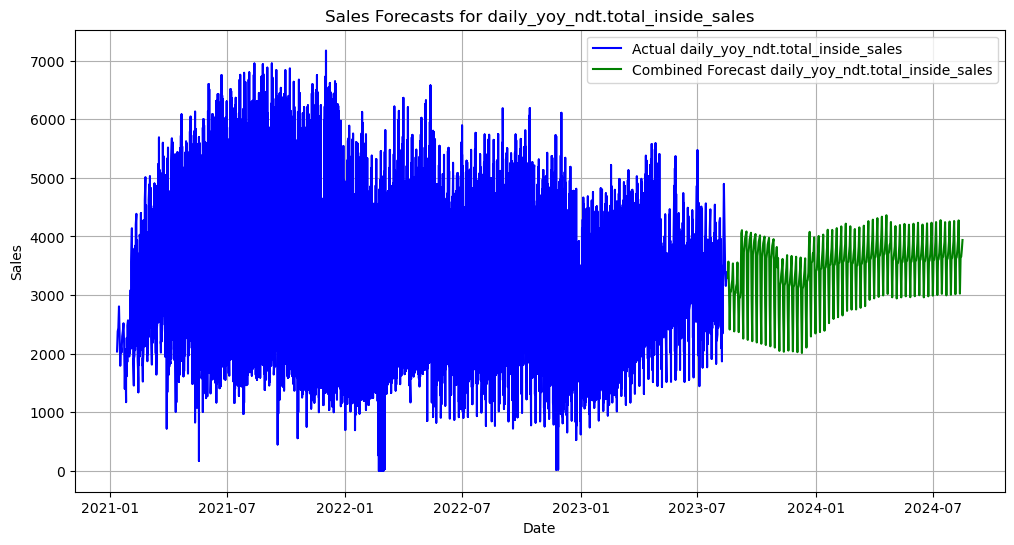

Mean Absolute Error (MAE): 722.81
Mean Squared Error (MSE): 828628.77
Root Mean Squared Error (RMSE): 910.29


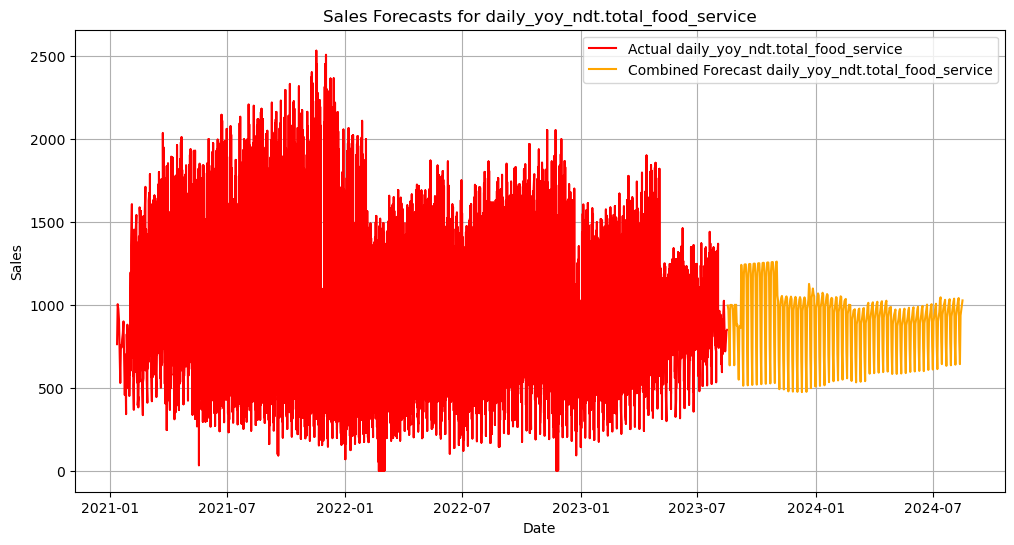

Mean Absolute Error (MAE): 246.21
Mean Squared Error (MSE): 89455.66
Root Mean Squared Error (RMSE): 299.09


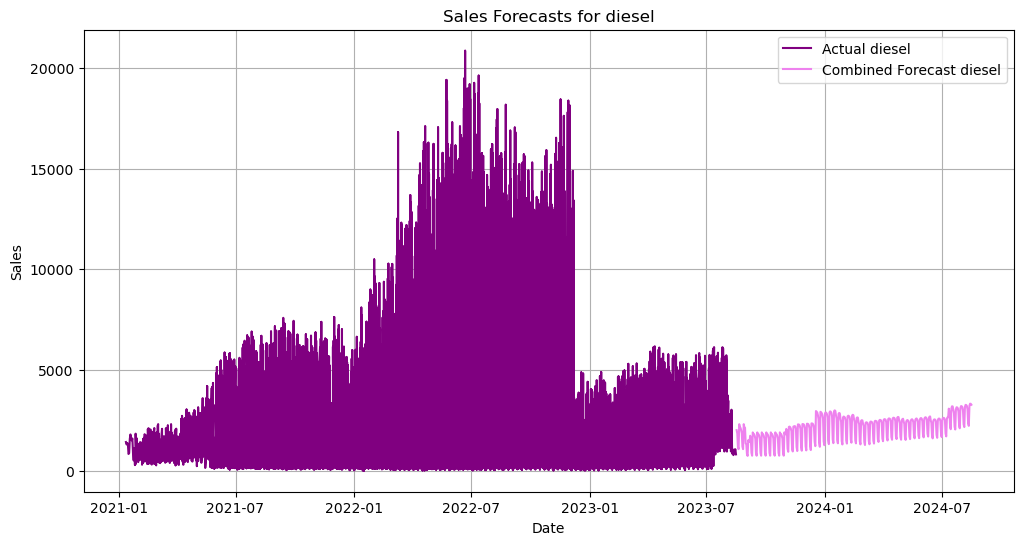

Mean Absolute Error (MAE): 1581.08
Mean Squared Error (MSE): 3458135.93
Root Mean Squared Error (RMSE): 1859.61


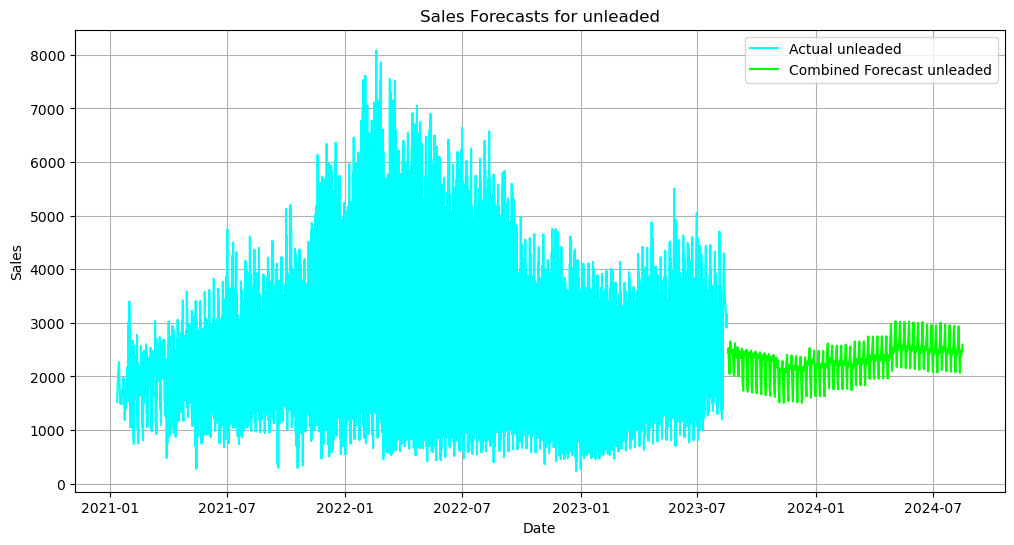

Mean Absolute Error (MAE): 854.03
Mean Squared Error (MSE): 1107821.98
Root Mean Squared Error (RMSE): 1052.53


In [58]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def load_data():
    # Load and preprocess your data here
    # Example:
    # timeseries = preprocess_timeseries_data()
    return timeseries

def build_forecasts(timeseries, sales_metric, forecast_horizon):
    all_forecasts = pd.DataFrame()

    for site_id in timeseries['site_id_msba'].unique():
        site_data = timeseries[timeseries['site_id_msba'] == site_id][[sales_metric]]

        model = ExponentialSmoothing(site_data, trend='add', seasonal='add', seasonal_periods=7)
        model_fit = model.fit()

        forecast = model_fit.forecast(steps=forecast_horizon)

        all_forecasts[f'Site_{site_id}_{sales_metric}'] = forecast

    return all_forecasts

def plot_sales_forecasts(timeseries, sales_metric, forecast_horizon, all_forecasts, color_actual, color_forecast):
    actual = timeseries[sales_metric]
    
    forecast_index = pd.date_range(start=timeseries.index[-1] + pd.DateOffset(days=1), periods=forecast_horizon)
    
    plt.figure(figsize=(12, 6))
    
    # Use different colors for actual and forecasted data for each sales metric
    plt.plot(actual.index, actual, label='Actual ' + sales_metric, color=color_actual)
    
    combined_forecast = all_forecasts.mean(axis=1)
    
    plt.plot(forecast_index, combined_forecast[-forecast_horizon:], label='Combined Forecast ' + sales_metric, color=color_forecast)

    plt.legend()
    plt.title('Sales Forecasts for ' + sales_metric)
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.grid(True)

    plt.show()

    actual_available = actual[-forecast_horizon:]
    combined_forecast = combined_forecast[-forecast_horizon:]

    mae = mean_absolute_error(actual_available, combined_forecast)
    mse = mean_squared_error(actual_available, combined_forecast)
    rmse = np.sqrt(mse)

    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

def main():
    timeseries = load_data()
    
    # Create a list of unique sales metrics with associated colors
    sales_metrics = [
        ('daily_yoy_ndt.total_inside_sales', 'blue', 'green'),
        ('daily_yoy_ndt.total_food_service', 'red', 'orange'),
        ('diesel', 'purple', 'violet'),
        ('unleaded', 'cyan', 'lime'),
    ]

    # Define the forecast horizon
    forecast_horizon = 365

    for sales_metric, color_actual, color_forecast in sales_metrics:
        all_forecasts = build_forecasts(timeseries, sales_metric, forecast_horizon)
        plot_sales_forecasts(timeseries, sales_metric, forecast_horizon, all_forecasts, color_actual, color_forecast)

if __name__ == "__main__":
    main()


In [97]:
# After fitting the model, we can examine the estimated parameters
estimated_trend = model_fit.params['smoothing_level']
estimated_seasonal = model_fit.params['smoothing_seasonal']

print(f'Estimated Trend Smoothing: {estimated_trend:.4f}')
print(f'Estimated Seasonal Smoothing: {estimated_seasonal:.4f}')


Estimated Trend Smoothing: 0.4293
Estimated Seasonal Smoothing: 0.1902


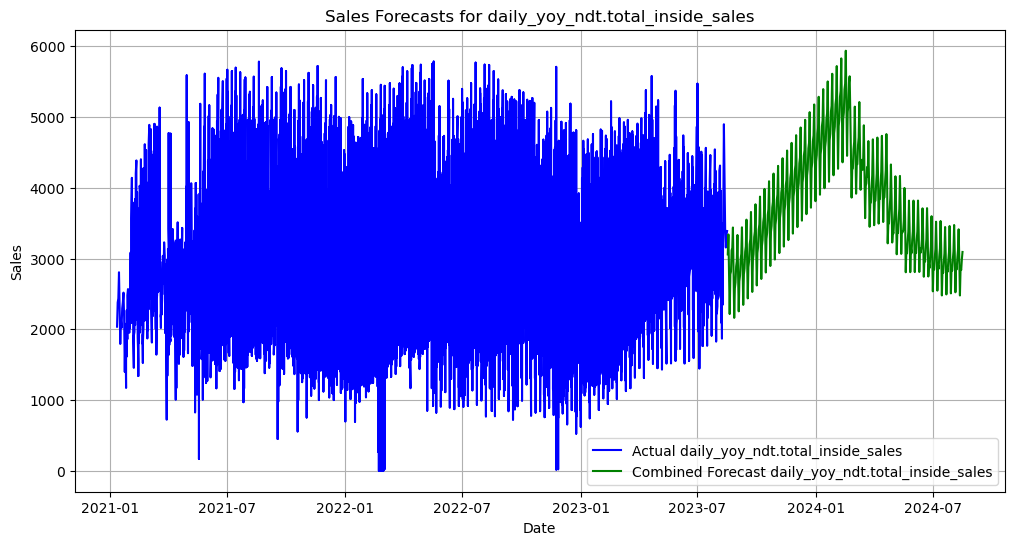

Mean Absolute Error (MAE): 922.27
Mean Squared Error (MSE): 1325122.21
Root Mean Squared Error (RMSE): 1151.14


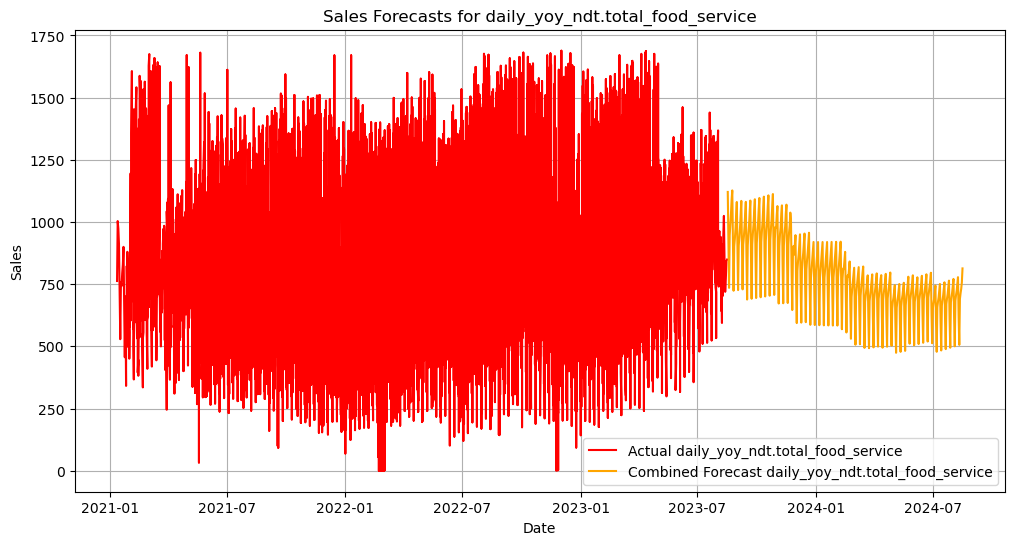

Mean Absolute Error (MAE): 243.82
Mean Squared Error (MSE): 92621.94
Root Mean Squared Error (RMSE): 304.34


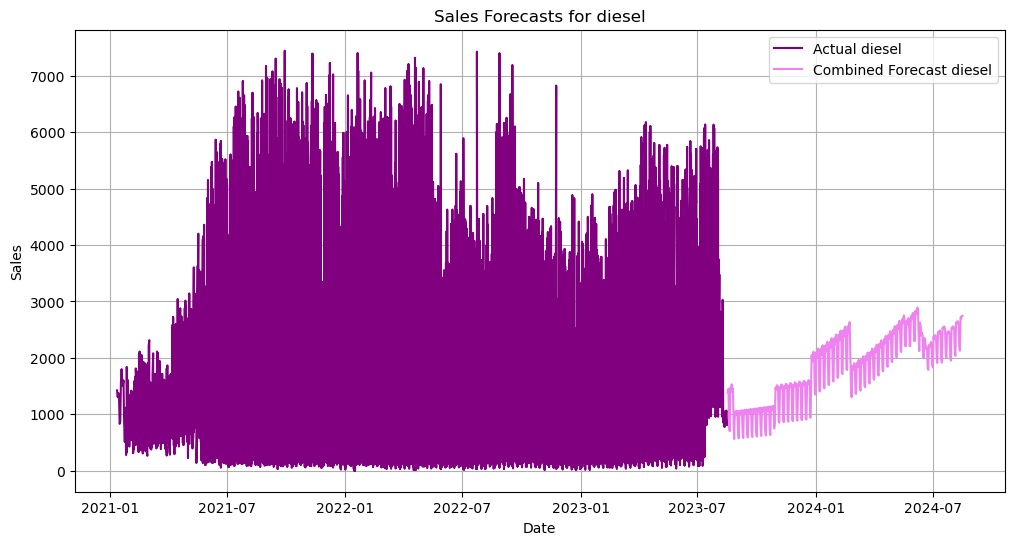

Mean Absolute Error (MAE): 1523.01
Mean Squared Error (MSE): 3373248.88
Root Mean Squared Error (RMSE): 1836.64


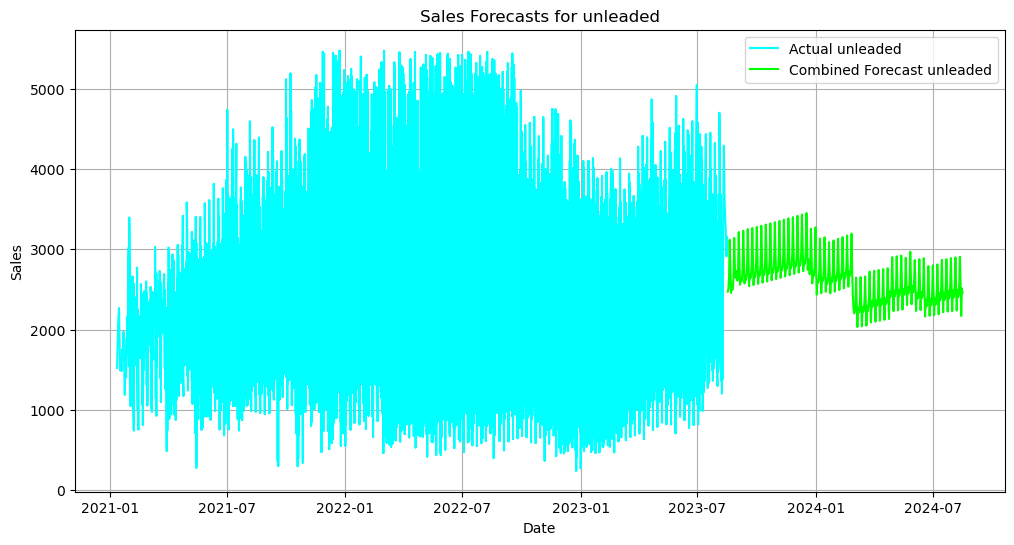

Mean Absolute Error (MAE): 853.58
Mean Squared Error (MSE): 1043328.87
Root Mean Squared Error (RMSE): 1021.43


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from scipy import stats

# Load and preprocess your data
def load_data():
    # Load and preprocess your data here
    return timeseries

def preprocess_data(timeseries):
    # Outlier detection and treatment (using z-score) for all sales metrics
    sales_metrics = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']

    for sales_metric in sales_metrics:
        z_scores = np.abs(stats.zscore(timeseries[sales_metric]))
        timeseries = timeseries[(z_scores < 3)]

    # Data transformation (to make it strictly positive) for all sales metrics
    for sales_metric in sales_metrics:
        small_constant = 0.01  # Small constant to make data strictly positive
        timeseries[sales_metric] = timeseries[sales_metric] + small_constant

    # Other data preprocessing steps as needed
    return timeseries

def build_forecasts(timeseries, sales_metric, forecast_horizon):
    all_forecasts = pd.DataFrame()

    tscv = TimeSeriesSplit(n_splits=5)

    for site_id in timeseries['site_id_msba'].unique():
        site_data = timeseries[timeseries['site_id_msba'] == site_id][[sales_metric]]

        best_rmse = float('inf')
        best_model = None

        for train_index, test_index in tscv.split(site_data):
            train_data, test_data = site_data.iloc[train_index], site_data.iloc[test_index]

            for trend in ['add', 'additive', 'multiplicative']:
                for seasonal in ['add', 'additive', 'multiplicative']:
                    model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=7)
                    model_fit = model.fit()
                    forecast = model_fit.forecast(steps=len(test_data))

                    rmse = np.sqrt(mean_squared_error(test_data, forecast))

                    if rmse < best_rmse:
                        best_rmse = rmse
                        best_model = model_fit

        forecast = best_model.forecast(steps=forecast_horizon)

        all_forecasts[f'Site_{site_id}_{sales_metric}'] = forecast

    return all_forecasts

def plot_sales_forecasts(timeseries, sales_metric, forecast_horizon, all_forecasts, color_actual, color_forecast):
    actual = timeseries[sales_metric]
    
    forecast_index = pd.date_range(start=timeseries.index[-1] + pd.DateOffset(days=1), periods=forecast_horizon)
    
    plt.figure(figsize=(12, 6))
    
    # Use different colors for actual and forecasted data for each sales metric
    plt.plot(actual.index, actual, label='Actual ' + sales_metric, color=color_actual)
    combined_forecast = all_forecasts.mean(axis=1)
    
    plt.plot(forecast_index, combined_forecast[-forecast_horizon:], label='Combined Forecast ' + sales_metric, color=color_forecast)

    plt.legend()
    plt.title('Sales Forecasts for ' + sales_metric)
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.grid(True)

    plt.show()

    actual_available = actual[-forecast_horizon:]
    combined_forecast = combined_forecast[-forecast_horizon:]

    mae = mean_absolute_error(actual_available, combined_forecast)
    mse = mean_squared_error(actual_available, combined_forecast)
    rmse = np.sqrt(mse)

    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

def main():
    timeseries = load_data()
    timeseries = preprocess_data(timeseries)
    
    # Create a list of unique sales metrics with associated colors
    sales_metrics = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']
    color_mappings = {'daily_yoy_ndt.total_inside_sales': ('blue', 'green'),
                      'daily_yoy_ndt.total_food_service': ('red', 'orange'),
                      'diesel': ('purple', 'violet'),
                      'unleaded': ('cyan', 'lime')}

    # Define the forecast horizon
    forecast_horizon = 365

    for sales_metric in sales_metrics:
        color_actual, color_forecast = color_mappings[sales_metric]
        all_forecasts = build_forecasts(timeseries, sales_metric, forecast_horizon)
        plot_sales_forecasts(timeseries, sales_metric, forecast_horizon, all_forecasts, color_actual, color_forecast)

if __name__ == "__main__":
    main()


### The Exponential Triple Smoothing (ETS) model, applied to forecast a diverse array of sales metrics, has demonstrated its adaptability and forecasting capabilities when assessing its performance.

### The ETS model's accuracy was evaluated using three essential performance metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

### Detailed performance outcomes for different sales metrics:

#### "Daily Year-over-Year NDT Total Inside Sales" exhibited an MAE of 922.27, indicating that, on average, the forecasted values deviated by this amount from the actual values. The MSE of 1,325,122.21 reveals the magnitude of forecast errors, and the RMSE of 1,151.14 offers an interpretable measure of the forecast's accuracy.

#### "Daily Year-over-Year NDT Total Food Service" achieved a notably lower MAE of 243.82, implying a more precise forecast for this metric. The MSE of 92,621.94 and RMSE of 304.34 signify relatively small prediction errors.

#### "Diesel Sales" demonstrated an MAE of 1,523.01, indicating a moderate level of forecast accuracy. The higher MSE of 3,373,248.88 and RMSE of 1,836.64 suggest that forecast errors for diesel sales were relatively larger compared to other metrics.

#### "Unleaded Sales" displayed an MAE of 853.58, implying a reasonably accurate forecast. The MSE of 1,043,328.87 and RMSE of 1,021.43 indicate a comparatively balanced forecast accuracy for unleaded sales.

### These performance metrics provide a comprehensive and nuanced evaluation of the ETS model's forecasting accuracy for different sales metrics. The findings underscore the model's versatility and its potential significance in data-driven decision-making. The variation in performance across sales metrics illuminates the model's strengths and potential areas for enhancement.

### The ETS model serves as a valuable tool for businesses, offering insights into how to optimize inventory, staffing, and operational decisions, especially when evaluating the feasibility of opening new stores. It enables data-driven decisions, enhances operational efficiency, and aids in achieving better forecast accuracy in the retail sector.




